<a href="https://colab.research.google.com/github/dinuka-rp/L6-AI/blob/main/Prasan_Yapa/Day1-ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting Customer Ad Clicks via Logistic Regression and Decision Tree Machine Learning models

## 1. Importing the Dataset

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
from scipy.stats import norm
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/advertising.csv')

data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


To further analyze our data, let's first plot a histogram with Kernel density estimation for the
'Age' variable.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


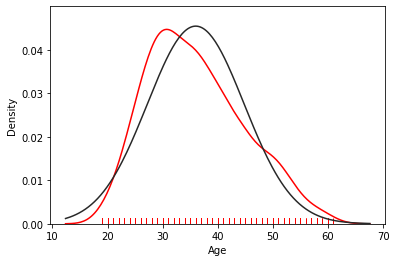

In [ ]:
sns.distplot(data['Age'], hist=False, color='r', rug=True, fit=norm)

## 2. Data Preprocessing

You may have noticed that "Ad Topic Line", "City", and "Country" are categorical columns.
Let's plot all the unique values for these columns.

In [ ]:
object_variables = ['Ad Topic Line', 'City', 'Country']
data[object_variables].describe(include=['O'])

,Ad Topic Line,City,Country
count,1000,1000,1000
unique,1000,969,237
top,Re-engineered impactful software,Lisamouth,Czech Republic
freq,1,3,9


The third categorical variable, i.e. "Country", has a unique element (France) that repeats 9
times. Additionally, we can determine countries with the highest number of visitors.

In [ ]:
pd.crosstab(index=data['Country'], columns='count').sort_values(['count'],
ascending=False).head(20)

col_0,count
Country,
France,9
Czech Republic,9
Afghanistan,8
Australia,8
Turkey,8
South Africa,8
Senegal,8
Peru,8
Micronesia,8


We have already seen, there are 237 different unique countries in our dataset and no single
country is too dominant. Many unique elements will not allow a machine learning model to
establish easily valuable relationships. For that reason, this variable will be excluded too.

In [ ]:
data = data.drop(['Ad Topic Line', 'City', 'Country'], axis=1)

Next, we will analyze the 'Timestamp' category. It represents the exact time when a user
clicked on the advertisement. We will expand this category to 4 new categories: month, day
of the month, day of the week, and hour. In this way, we will get new variables that an ML
model will be able to process and find possible dependencies and correlations. Since we have
created new variables, we will exclude the original variable "Timestamp" from the table. The
"Day of the week" variable contains values from 0 to 6, where each number represents a
specific day of the week (from Monday to Sunday).

In [ ]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Month'] = data['Timestamp'].dt.month
data['Day of the month'] = data['Timestamp'].dt.day
data["Day of the week"] = data['Timestamp'].dt.dayofweek
data['Hour'] = data['Timestamp'].dt.hour
data = data.drop(['Timestamp'], axis=1)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day of the month,Day of the week,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,6,0
1,80.23,31,68441.85,193.77,1,0,4,4,0,1
2,69.47,26,59785.94,236.50,0,0,3,13,6,20
3,74.15,29,54806.18,245.89,1,0,1,10,6,2
4,68.37,35,73889.99,225.58,0,0,6,3,4,3


## 3. Train and test data sets

Once the dataset is processed, we need to divide it into two parts: training and test set. We
will import and use the train_test_split function for that. All variables except 'Clicked on Ad'
will be the input values X for the ML models. The variable 'Clicked on Ad' will be stored in y
and will represent the prediction variable. We arbitrarily chose to allocate 33% of the total
data for the training set

In [ ]:
from sklearn.model_selection import train_test_split

X = data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage',
 'Male', 'Month', 'Day of the month', 'Day of the week']]
y = data['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
random_state=42)

## 4. Model development

The first model we will import will be a Logistic Regression model. First, it is necessary to load
the LogisticRegression function from the sklearn.linear_model library. Also, we will load the
accuracy_score to evaluate the classification performances of the model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model_1 = LogisticRegression(solver='lbfgs')
model_1.fit(X_train, y_train)

predictions_LR = model_1.predict(X_test)

print('Logistic regression accuracy:', accuracy_score(predictions_LR, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions_LR)) # expected output, prediction produced by the model

Logistic regression accuracy: 0.906060606060606

Confusion matrix:
[[158   4]
 [ 27 141]]


Now we will import DecisionTreeClassifier from sklearn.tree library. model_2 will be based on
the decision tree technique, it will be trained as in the previous case, and desired predictions
will be made.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)

predictions_DT = model_2.predict(X_test)

print('Decision tree accuracy:', accuracy_score(predictions_DT, y_test))
print('')
print('Confusion matrix:')
print(confusion_matrix(y_test, predictions_DT))

Decision tree accuracy: 0.9424242424242424

Confusion matrix:
[[153   9]
 [ 10 158]]


It can be concluded that the Decision Tree model showed better performances in comparison
to the Logistic Regression model. The confusion matrix shows us that the 308 predictions have
been done correctly and that there are only 22 incorrect predictions. Additionally, Decision
Tree accuracy is better by about 3% in comparison to the first regression model.